In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data= pd.read_csv('heloc_train.csv')

In [3]:
data.tail()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
9408,Bad,65,115,11,43,19,0,0,90,1,...,50,-7,0,0,52,77,5,6,0,85
9409,Bad,77,437,8,115,35,0,0,100,-7,...,26,1,3,3,23,74,6,2,0,50
9410,Good,75,140,7,56,21,0,0,100,-7,...,27,0,1,1,20,63,3,2,1,56
9411,Bad,64,92,3,35,21,2,2,91,33,...,23,0,1,1,9,58,3,4,0,53
9412,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [4]:
df= pd.DataFrame(data)

In [5]:
missing_values = df.isna().sum()
print(missing_values)

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64


In [13]:
df_encoded = pd.get_dummies(df, columns=['RiskPerformance'], drop_first=True)

In [14]:
df_encoded.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance_Good
0,69,148,4,66,41,0,0,100,-7,7,...,-7,1,1,32,60,7,3,1,50,False
1,77,229,3,109,23,0,0,100,-7,7,...,0,0,0,38,93,4,3,1,58,False
2,58,46,7,38,13,0,0,93,8,4,...,-7,2,2,80,84,5,4,1,90,False
3,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,False
4,80,226,2,66,35,0,0,100,-7,7,...,0,0,0,2,77,5,7,0,62,False


In [16]:
df_encoded["RiskPerformance_Good"] = df_encoded["RiskPerformance_Good"].astype(int)

In [18]:
df_encoded.tail()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance_Good
9408,65,115,11,43,19,0,0,90,1,4,...,-7,0,0,52,77,5,6,0,85,0
9409,77,437,8,115,35,0,0,100,-7,7,...,1,3,3,23,74,6,2,0,50,0
9410,75,140,7,56,21,0,0,100,-7,7,...,0,1,1,20,63,3,2,1,56,1
9411,64,92,3,35,21,2,2,91,33,6,...,0,1,1,9,58,3,4,0,53,0
9412,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,0


In [6]:
import seaborn as sn

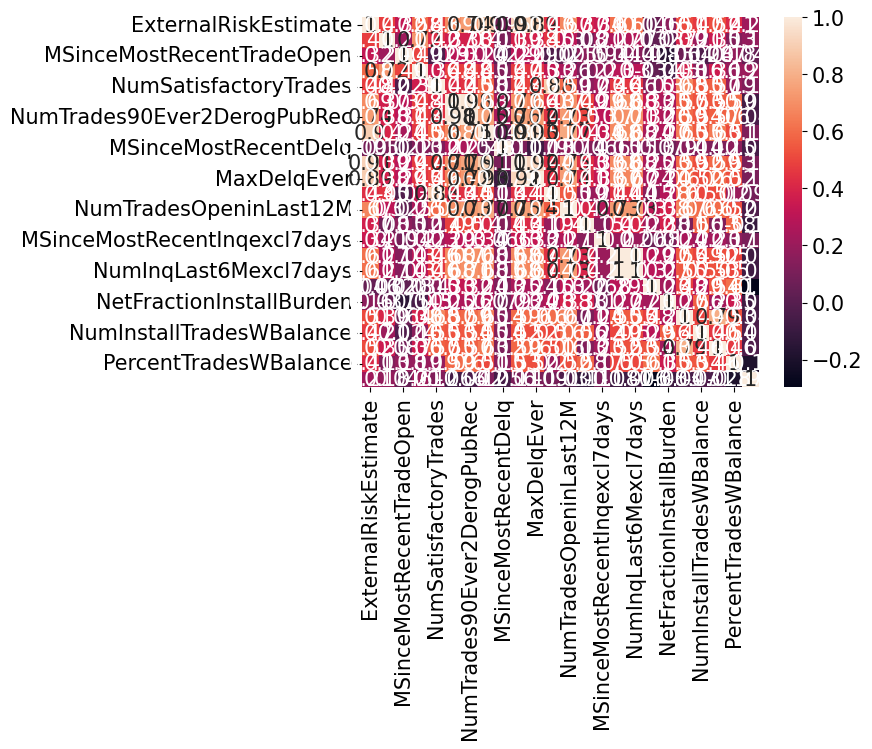

In [23]:
corr_matrix= df_encoded.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

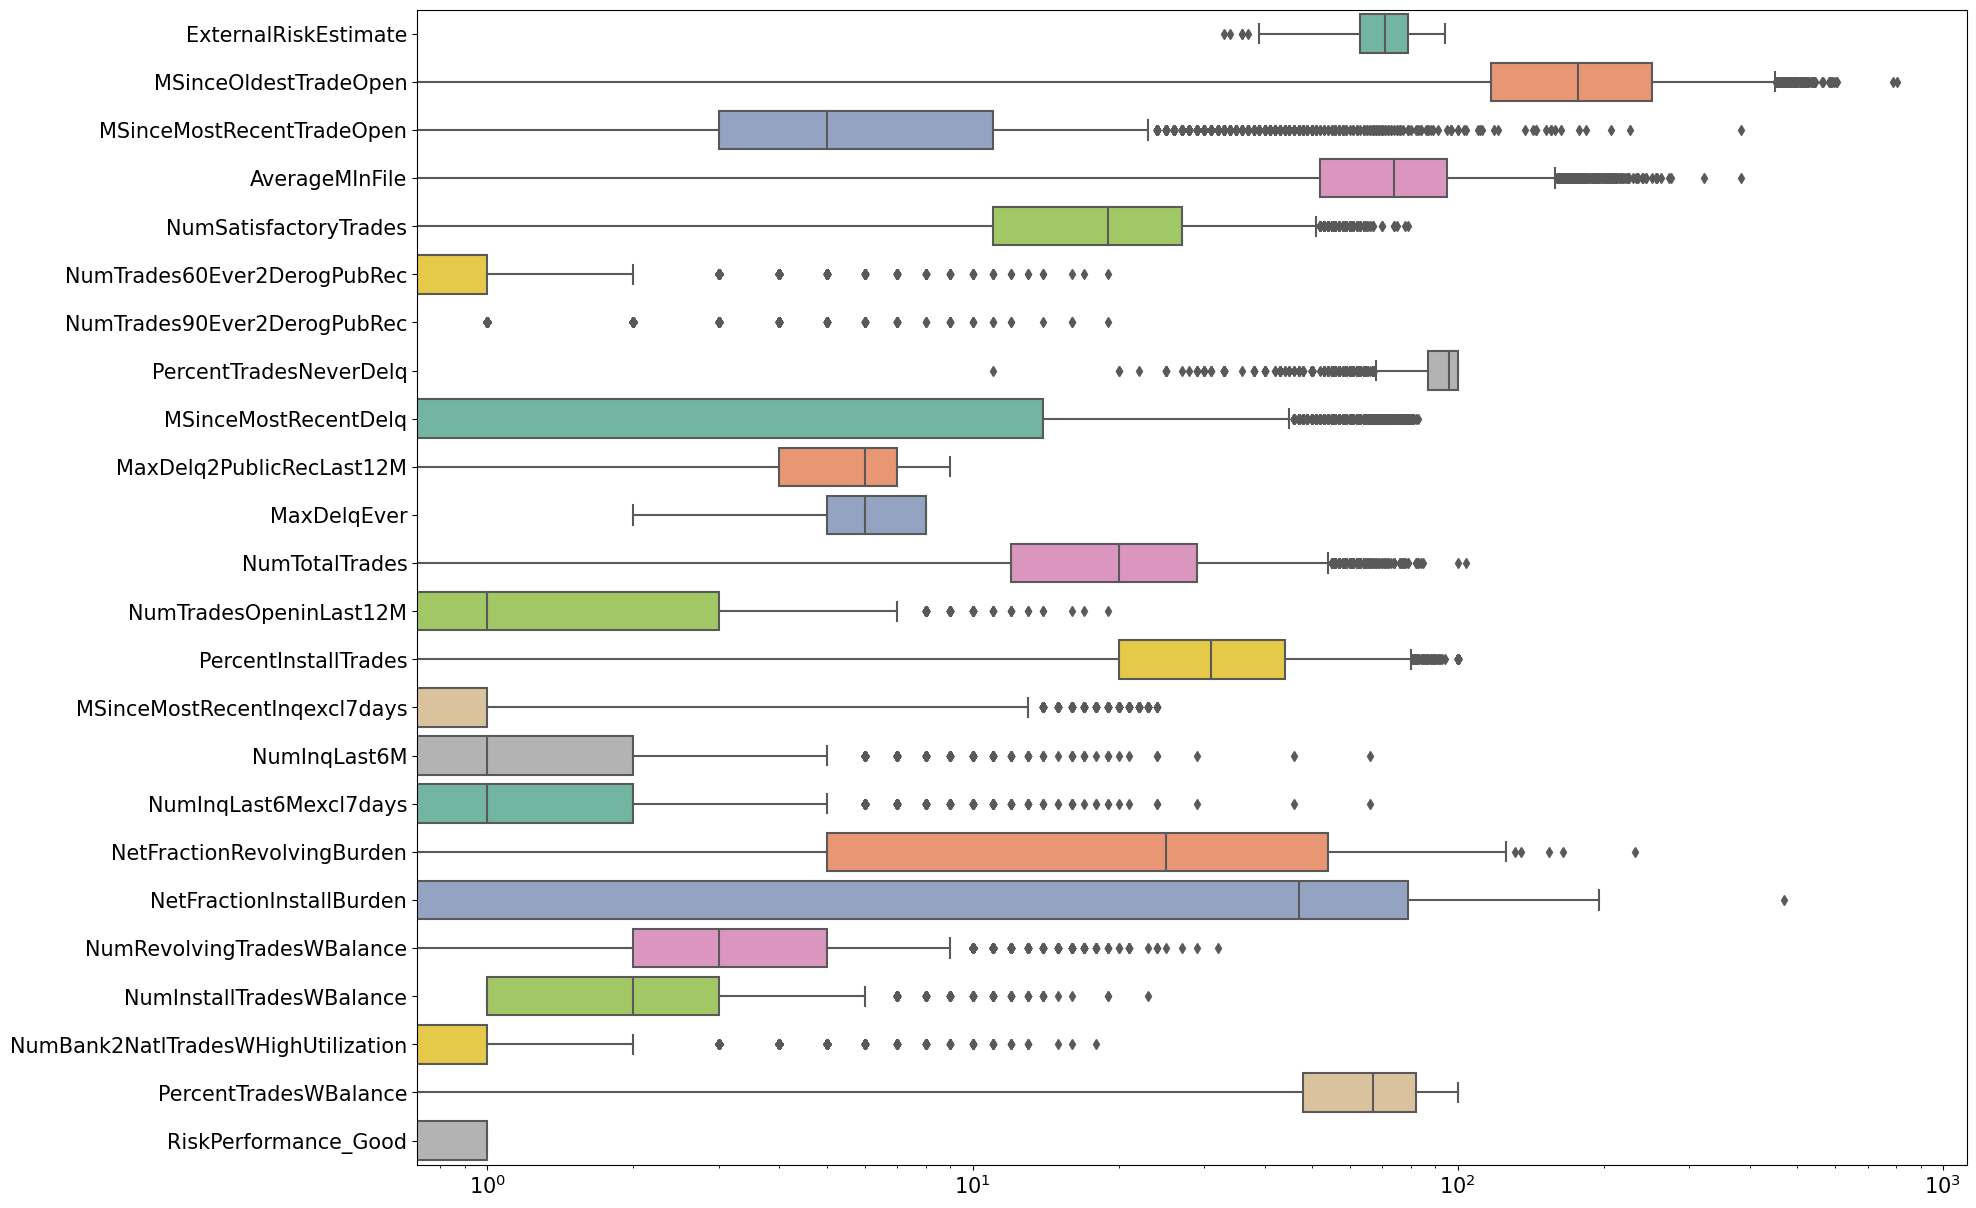

In [22]:
from matplotlib import pyplot 

pyplot.rcParams['font.size'] = 15
plt.figure(figsize=(20, 15))
sn.boxplot(data=df_encoded, orient="h", palette="Set2")
pyplot.xscale('log')
pyplot.show()

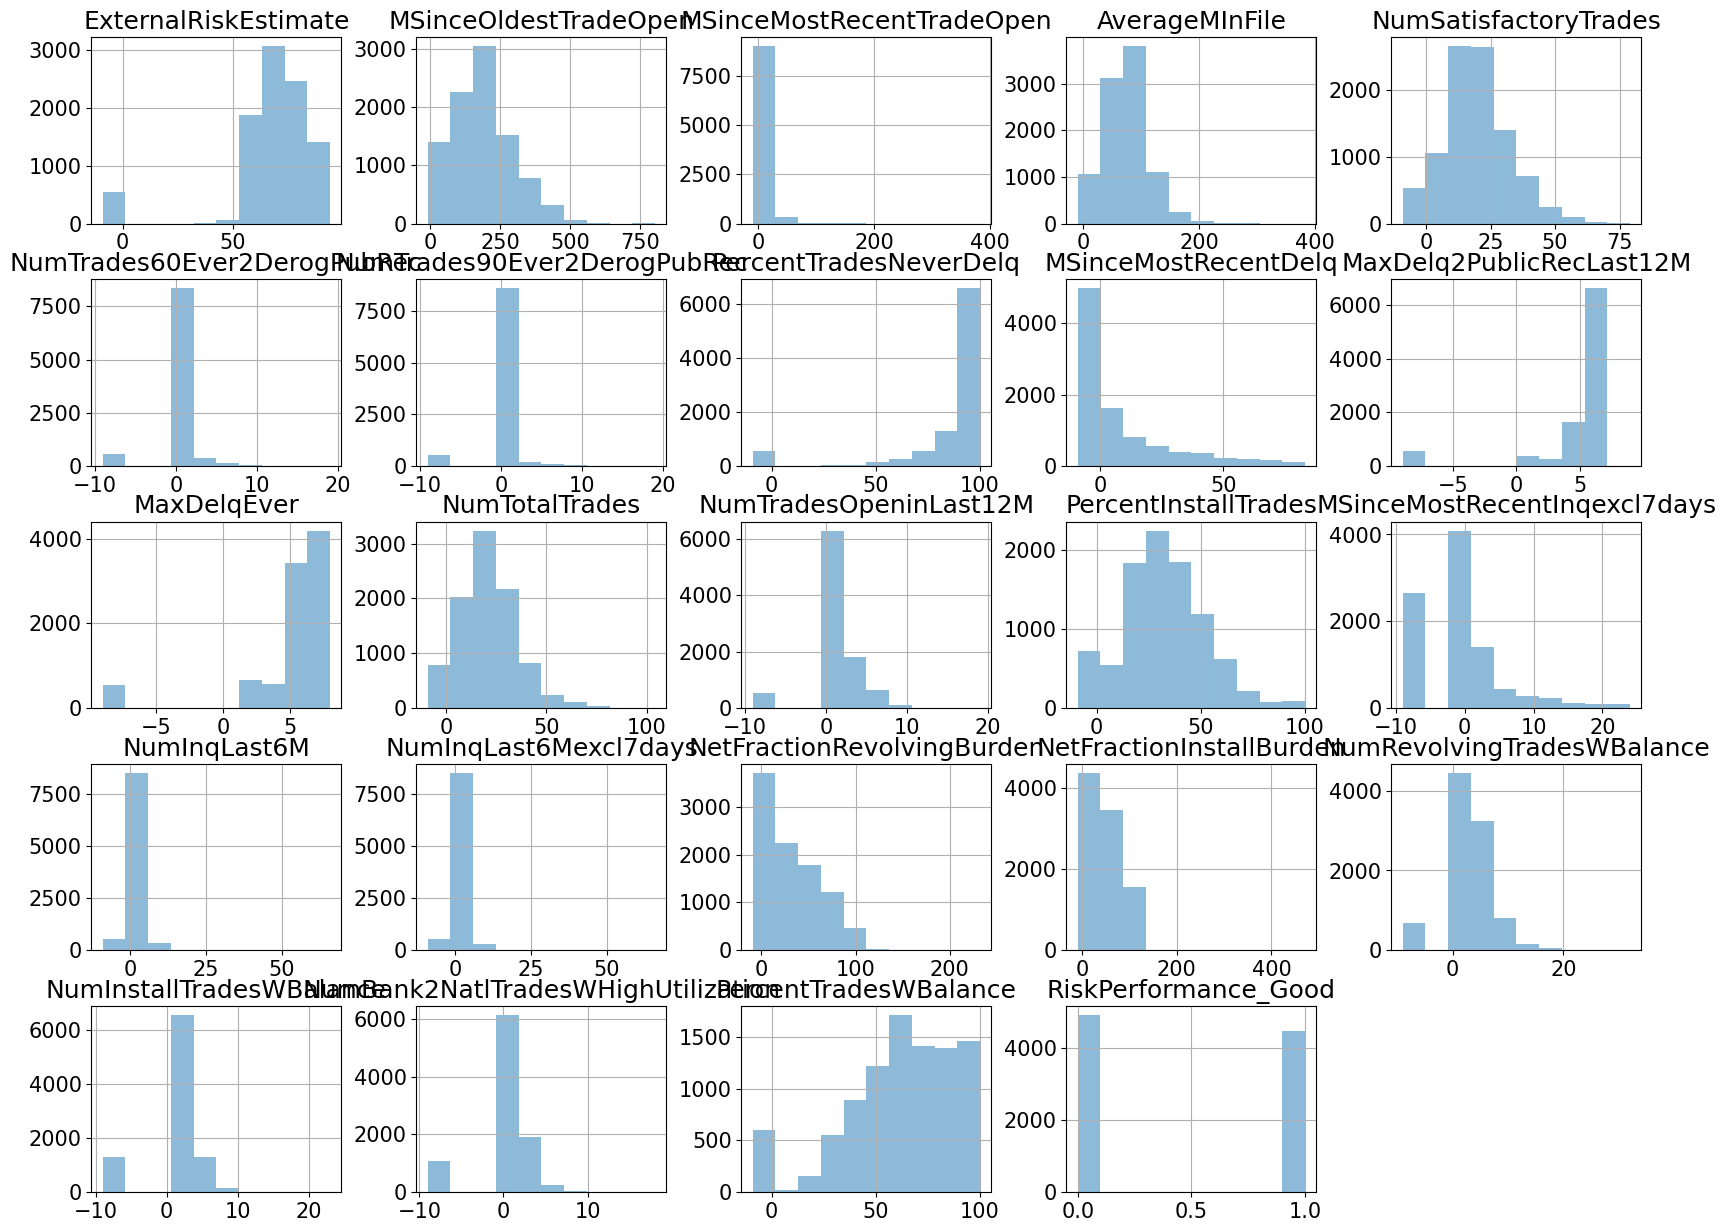

In [24]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
pyplot.rcParams['font.size'] = 15
df_encoded.hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

### Feature Selection on random forest classifier ###

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

x = df_encoded.drop('RiskPerformance_Good', axis=1)
y= df_encoded['RiskPerformance_Good']

selector = RFE(RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1))
selector = selector.fit(x,y)

# Print the selected features
selected_features = [index for index, value in enumerate(selector.get_support()) if value]
print(f"Selected features: {selected_features}")


Selected features: [0, 1, 2, 3, 4, 7, 11, 13, 14, 17, 22]


### Splitting data ###

In [30]:
# Split the data into training and testing sets (90% train, 10% test)
x_train, x_test, y_train, y_test = train_test_split(x.iloc[:, selected_features], y, test_size=0.1, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8471, 11)
X_test shape: (942, 11)
y_train shape: (8471,)
y_test shape: (942,)


### Hyperparameter Tuning ###

In [31]:
from sklearn.metrics import classification_report

# Base model to tune
base_model = RandomForestClassifier(random_state=42) 

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}

# Create the randomized search
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the randomized search
random_search.fit(x,y)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 135}


### Random Forest ###

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
random_forest_clf = RandomForestClassifier(max_depth=13,
                                           max_features='sqrt',
                                           min_samples_leaf=3, 
                                           min_samples_split=6, 
                                           n_estimators=135,
                                           random_state=42)

# Fit the Random Forest classifier on the training data
random_forest_clf.fit(x_train, y_train) #fit model on only selected features

RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=135, random_state=42)

### Evaluation Metrics ###

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# predictions
y_pred = random_forest_clf.predict(x_test)

# Evaluate the classifier using cross-validation
scores = cross_val_score(random_forest_clf, x_test, y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()), '\n')

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall: {recall:.2f}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

# AUC-ROC
y_prob = random_forest_clf.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC-ROC: {roc_auc:.2f}")

0.70 accuracy with a standard deviation of 0.047 

Accuracy: 0.69
Precision:0.73
Recall: 0.61
F1-score: 0.67
AUC-ROC: 0.76


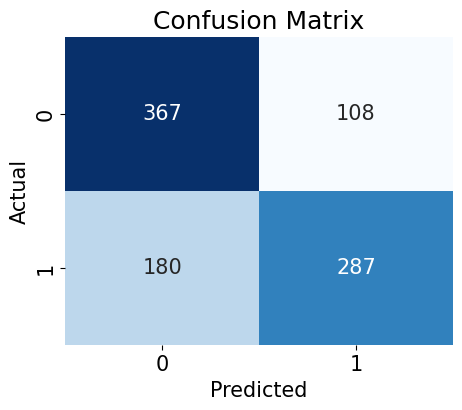

True Positive (TP): 287
False Positive (FP): 108
True Negative (TN): 367
False Negative (FN): 180
True positive rate (FPR): 0.23
True negative rate (TNR): 0.77
False positive rate (FPR): 0.23
False negative rate (FNR): 0.39


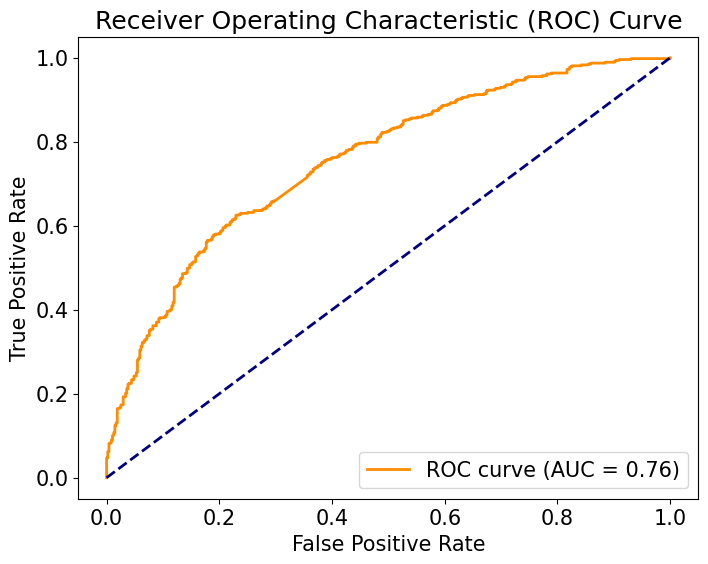

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)


print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)
print(f'True positive rate (FPR): {FPR:.2f}')
print(f'True negative rate (TNR): {TNR:.2f}')
print(f'False positive rate (FPR): {FPR:.2f}')
print(f'False negative rate (FNR): {FNR:.2f}')


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_prob contains the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Importing Test file and Exporting results ##

In [40]:
# Import test csv
inpTest = pd.read_csv('heloc_test.csv')

inp_df = pd.DataFrame(inpTest)
inp_df.head()


,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,81,333,27,132,12,0,0,100,-7,7,...,25,0,1,1,51,89,3,1,0,80
1,59,137,11,78,31,0,0,91,1,4,...,47,0,0,0,62,93,12,4,3,94
2,61,79,4,36,19,0,0,95,5,4,...,26,0,6,6,31,86,5,3,1,62
3,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [41]:
inp_selected = inp_df.iloc[:, selected_features]

In [43]:
y_prob_inp = random_forest_clf.predict_proba(inp_selected)[:, 1]
custom_threshold = 0.43
binary_predictions = (y_prob_inp > custom_threshold).astype(int)
pd.DataFrame(binary_predictions).to_csv('AMLHeloc_RF_predictions_2711.csv', 
                                               index=True, 
                                               header=["prediction"])

### Adding ADABoosting to Random Forest ###

In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Create AdaBoost classifier using the base classifier
adaboost_clf = AdaBoostClassifier(random_forest_clf, n_estimators=100, random_state=42)

# Fit the AdaBoost classifier on the training data
adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=13,
                                                    min_samples_leaf=3,
                                                    min_samples_split=6,
                                                    n_estimators=135,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# predictions
y_pred_ada = adaboost_clf.predict(x_test)

# Evaluate the classifier using cross-validation
scores_ada = cross_val_score(adaboost_clf, x_test, y_test, cv=5)
print("%0.2f accuracy with a standard deviation of %0.3f" % (scores_ada.mean(), scores_ada.std()))

# Accuracy, Precision, Recall
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)

print("Accuracy:", accuracy_ada)
print("Precision:", precision_ada)
print("Recall:", recall_ada)

# F1-score
f1_ada = f1_score(y_test, y_pred_ada)
print(f"F1-score: {f1_ada:.4f}")

# AUC-ROC
y_prob_ada = adaboost_clf.predict_proba(x_test)[:, 1]
roc_auc_ada = roc_auc_score(y_test, y_prob_ada)
print(f"AUC-ROC: {roc_auc_ada:.4f}")

0.68 accuracy with a standard deviation of 0.059
Accuracy: 0.6836518046709129
Precision: 0.7096774193548387
Recall: 0.6124197002141327
F1-score: 0.6575
AUC-ROC: 0.7477
